# <span style="color:#FFD700">GOLD LAYER</span>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import requests
import warnings
import numpy as np
import seaborn as sns

In [3]:
warnings.filterwarnings('ignore')

In [5]:
low_memory=False

In [7]:
df=pd.read_csv('spotify_charts_silver_with_artists_and_titles.csv')

In [9]:
if df.isna().sum().sum() == 0:
    print("No missing values.")
else:
    print("There are missing values in the data.")
    print("\nMissing values per column:")
    print(df.isna().sum())

There are missing values in the data.

Missing values per column:
title                      0
rank                       0
date                       0
artist                     0
url                        0
region                     0
chart                5851610
trend                      0
streams                    0
year                       0
month                      0
day                        0
day_of_week                0
song_id                   29
estimated_streams          0
adjusted_streams           0
dtype: int64


In [9]:
# It ranks songs based on their 'streams' within each 'date' group, labels songs in the top 200 as 'TOP 200', or 'OUT TOP LIST'
# and fills missing values in the 'chart' column with this rank-based status.

def process_chunk(chunk, date_group):
    chunk['temp_stream_rank'] = chunk.groupby('date')['streams'].rank(method='first', ascending=False)
    chunk['rank_status'] = np.where(chunk['temp_stream_rank'] <= 200, 'TOP 200', 'OUT TOP LIST')
    chunk.loc[chunk['chart'].isnull(), 'chart'] = chunk.loc[chunk['chart'].isnull(), 'rank_status']
    chunk = chunk.drop(['temp_stream_rank', 'rank_status'], axis=1)
    
    return chunk

input_file = 'spotify_charts_silver_with_artists_and_titles.csv'
output_file = 'goldlayer_Spotify_Charts.csv'

chunk_size = 500000

date_group = pd.DataFrame()

for chunk in pd.read_csv(input_file, chunksize=chunk_size):
    processed_chunk = process_chunk(chunk, date_group)
    processed_chunk.to_csv(output_file, mode='a', index=False, header=not pd.io.common.file_exists(output_file))
    
    print(f"Processed chunk of size {len(processed_chunk)}")

print(f"Processing complete. Updated dataset saved to '{output_file}'")

Processed chunk of size 500000
Processed chunk of size 500000
Processed chunk of size 500000
Processed chunk of size 500000
Processed chunk of size 500000
Processed chunk of size 500000
Processed chunk of size 500000
Processed chunk of size 500000
Processed chunk of size 500000
Processed chunk of size 500000
Processed chunk of size 500000
Processed chunk of size 500000
Processed chunk of size 500000
Processed chunk of size 500000
Processed chunk of size 500000
Processed chunk of size 500000
Processed chunk of size 500000
Processed chunk of size 500000
Processed chunk of size 500000
Processed chunk of size 500000
Processed chunk of size 500000
Processed chunk of size 500000
Processed chunk of size 500000
Processed chunk of size 500000
Processed chunk of size 500000
Processed chunk of size 500000
Processed chunk of size 500000
Processed chunk of size 500000
Processed chunk of size 500000
Processed chunk of size 500000
Processed chunk of size 500000
Processed chunk of size 500000
Processe

In [13]:
df=pd.read_csv('goldlayer_Spotify_Charts.csv')
null_chart_rows = df[df['chart'].isnull()]

print(null_chart_rows)

Empty DataFrame
Columns: [title, rank, date, artist, url, region, chart, trend, streams, year, month, day, day_of_week, song_id, estimated_streams, adjusted_streams]
Index: []



<h2 style="color:blue;">Reports and Charts</h2>


In [15]:
# Grouping by trend and region
grouped = df.groupby(['trend', 'region']).agg({
    'streams': ['mean', 'sum', 'count']}).reset_index()

grouped.columns = ['trend', 'region', 'avg_streams', 'total_streams', 'num_songs']

print(grouped)

             trend  region    avg_streams  total_streams  num_songs
0        MOVE_DOWN       0   33356.282277   3.933239e+09     117916
1        MOVE_DOWN       1   40181.770718   7.787589e+09     193809
2        MOVE_DOWN       2   18686.947004   3.691102e+09     197523
3        MOVE_DOWN       3    6962.527344   1.366445e+09     196257
4        MOVE_DOWN       4    4728.459359   8.541111e+08     180632
..             ...     ...            ...            ...        ...
275  SAME_POSITION      65   21114.955794   7.489475e+08      35470
276  SAME_POSITION      66  134659.440405   3.800628e+09      28224
277  SAME_POSITION      67  231903.390783   6.793610e+09      29295
278  SAME_POSITION      68    6903.012180   1.773867e+08      25697
279  SAME_POSITION      69    8525.084035   1.508514e+08      17695

[280 rows x 5 columns]


In [18]:
# Define a broader mapping from regions to continents
region_to_continent = {
    # North America
    'United States': 'North America',
    'Canada': 'North America',
    'Mexico': 'North America',

    # South America
    'Argentina': 'South America',
    'Brazil': 'South America',
    'Chile': 'South America',
    'Colombia': 'South America',

    # Europe
    'United Kingdom': 'Europe',
    'Germany': 'Europe',
    'France': 'Europe',
    'Spain': 'Europe',
    'Italy': 'Europe',

    # Asia
    'China': 'Asia',
    'Japan': 'Asia',
    'India': 'Asia',
    'South Korea': 'Asia',
    'Indonesia': 'Asia',

    # Africa
    'South Africa': 'Africa',
    'Nigeria': 'Africa',
    'Egypt': 'Africa',
    'Kenya': 'Africa',

    # Oceania
    'Australia': 'Oceania',
    'New Zealand': 'Oceania'
}

df['continent'] = df['region'].map(region_to_continent).fillna('Other')

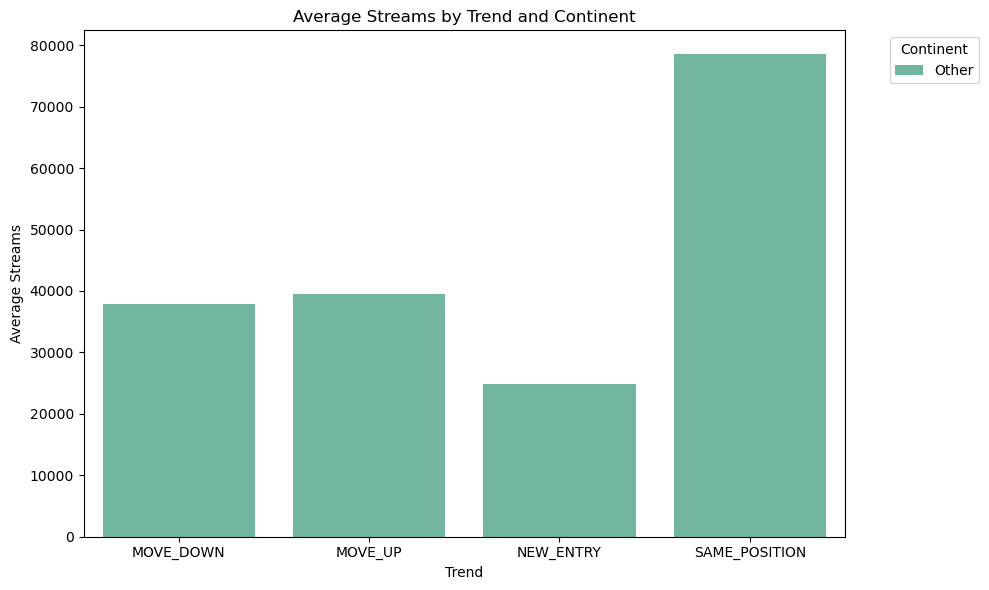

In [20]:
input_file = 'goldlayer_Spotify_Charts.csv'
chunk_size = 500000

grouped_chunks = []

for chunk in pd.read_csv(input_file, chunksize=chunk_size):
  chunk['continent'] = chunk['region'].map(region_to_continent).fillna('Other')

  grouped_chunk = chunk.groupby(['trend', 'continent']).agg(
      avg_streams=('streams', 'mean'),
      total_streams=('streams', 'sum'),
      num_songs=('streams', 'size')
  ).reset_index()

  grouped_chunks.append(grouped_chunk)

grouped_continent_total = pd.concat(grouped_chunks, ignore_index=True)

grouped_continent = grouped_continent_total.groupby(['trend', 'continent']).agg(
  avg_streams=('avg_streams', 'mean'),
  total_streams=('total_streams', 'sum'),
  num_songs=('num_songs', 'sum')
).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_continent, x='trend', y='avg_streams', hue='continent', palette='Set2')
plt.title('Average Streams by Trend and Continent')
plt.ylabel('Average Streams')
plt.xlabel('Trend')
plt.legend(title='Continent', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

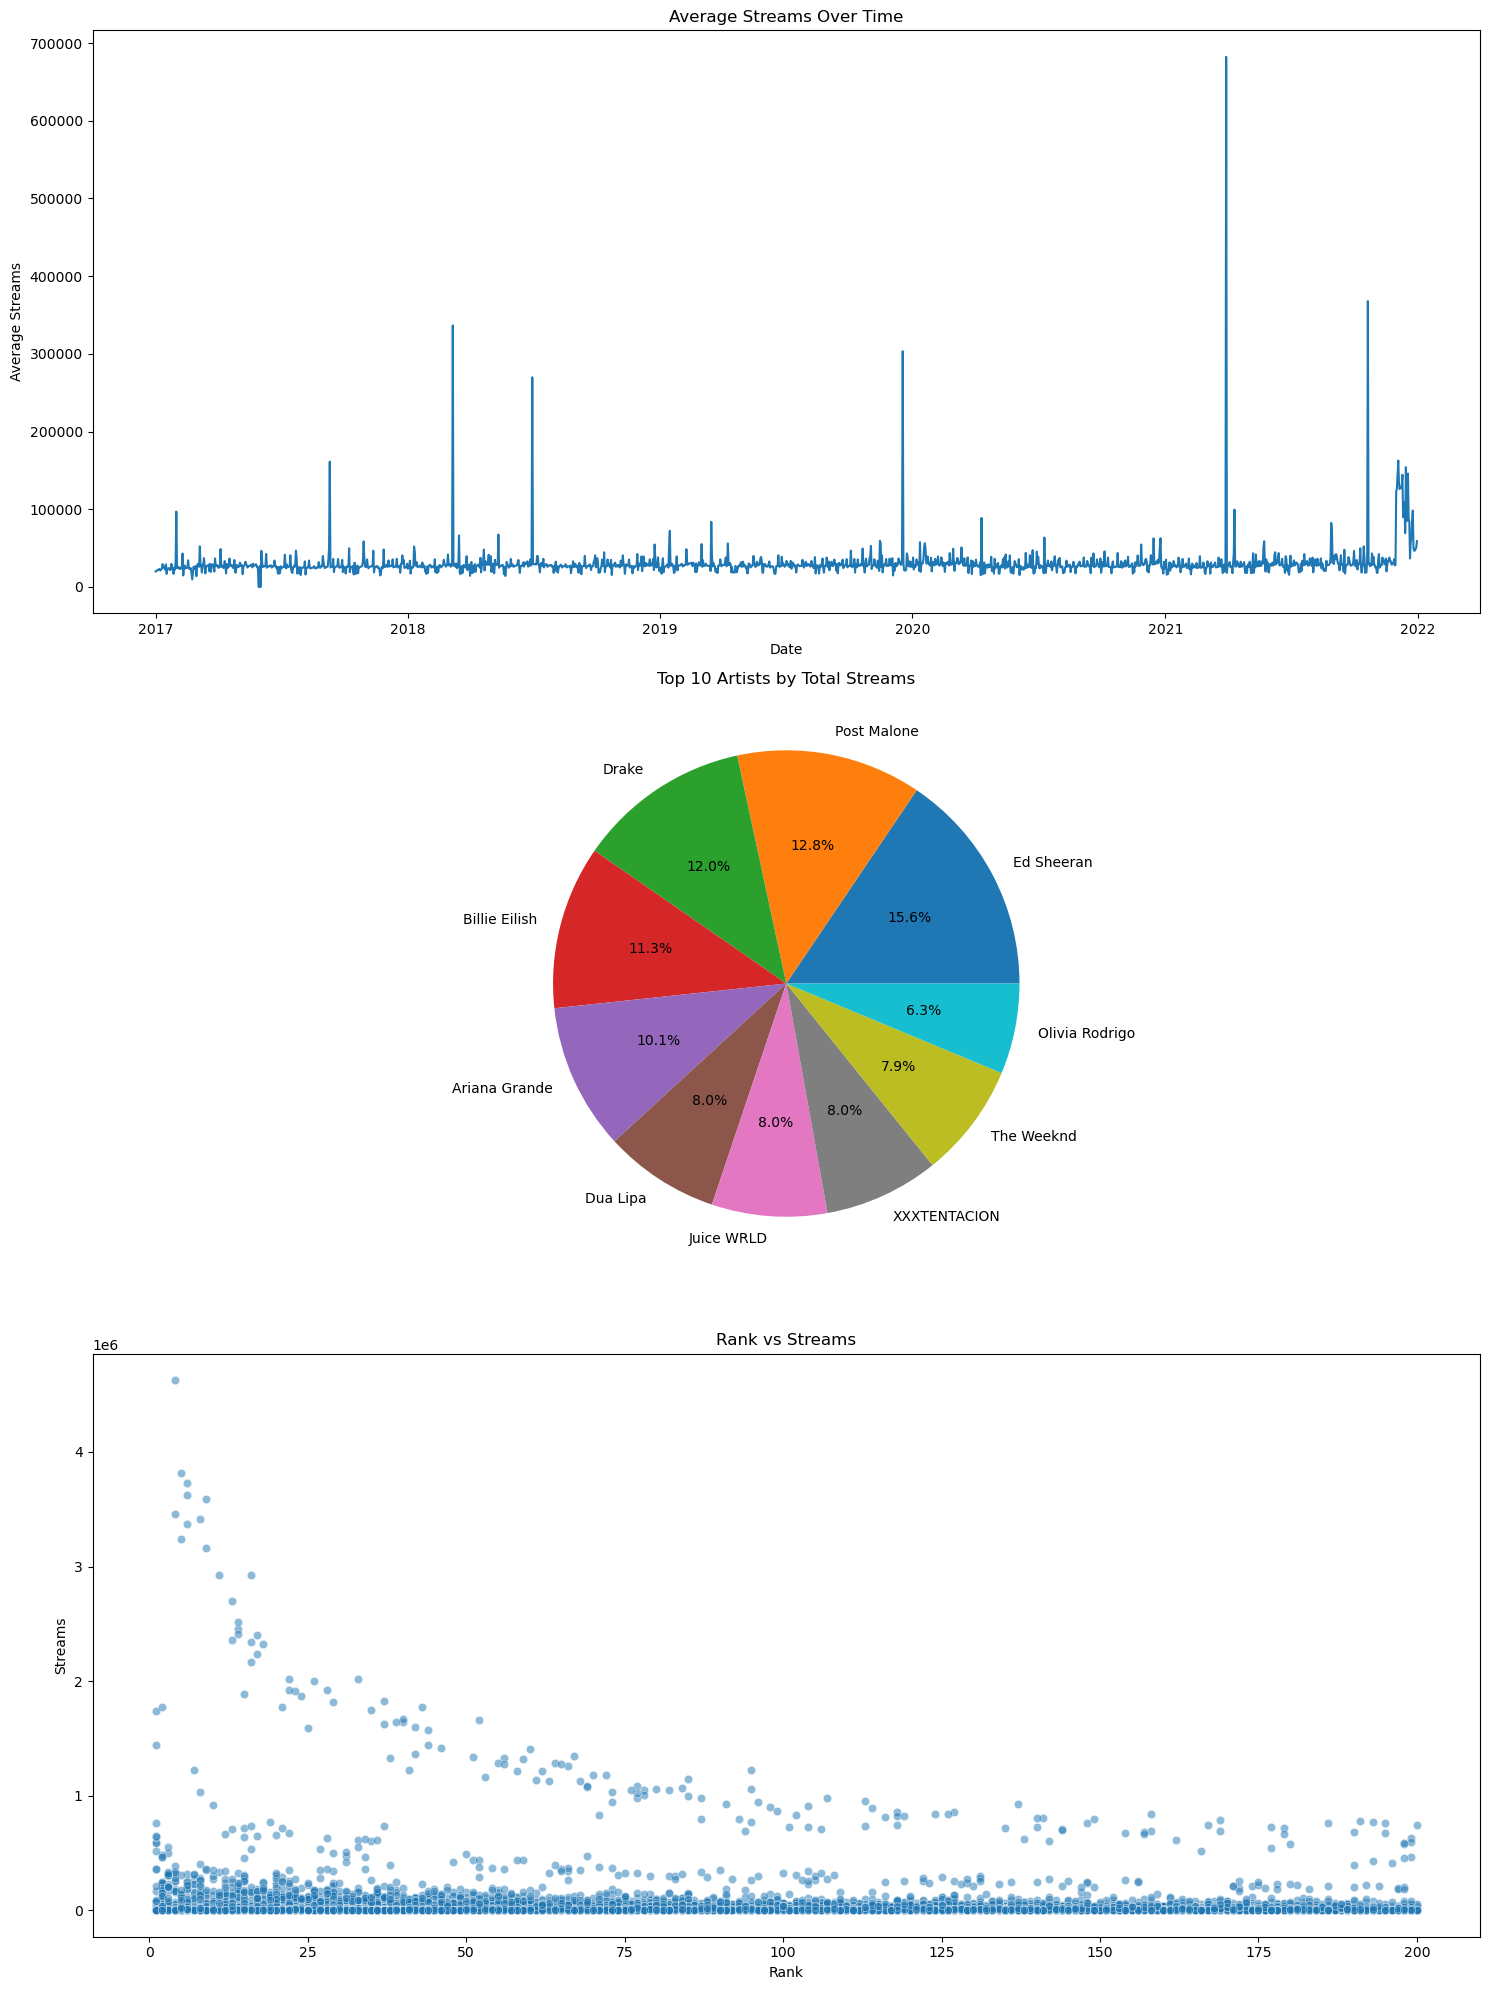

In [11]:
chunk_size = 500000

streams_by_date = pd.DataFrame()
top_artists = pd.DataFrame()
rank_streams = pd.DataFrame()

for chunk in pd.read_csv(input_file, chunksize=chunk_size):
  date_streams = chunk.groupby('date')['streams'].mean().reset_index()
  streams_by_date = pd.concat([streams_by_date, date_streams])

  artist_streams = chunk.groupby('artist')['streams'].sum().reset_index()
  top_artists = pd.concat([top_artists, artist_streams])

  rank_streams = pd.concat([rank_streams, chunk[['rank', 'streams']]])

streams_by_date = streams_by_date.groupby('date')['streams'].mean().reset_index()
top_artists = top_artists.groupby('artist')['streams'].sum().nlargest(10).reset_index()
rank_streams = rank_streams.sample(n=10000)

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 20))

ax1.plot(pd.to_datetime(streams_by_date['date']), streams_by_date['streams'])
ax1.set_title('Average Streams Over Time')
ax1.set_xlabel('Date')
ax1.set_ylabel('Average Streams')

ax2.pie(top_artists['streams'], labels=top_artists['artist'], autopct='%1.1f%%')
ax2.set_title('Top 10 Artists by Total Streams')

sns.scatterplot(data=rank_streams, x='rank', y='streams', ax=ax3, alpha=0.5)
ax3.set_title('Rank vs Streams')
ax3.set_xlabel('Rank')
ax3.set_ylabel('Streams')

plt.tight_layout()
plt.show()